In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
display(df)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


C:\Users\User\AppData\Local\Temp\ipykernel_21484\270786113.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Class', data = df, palette = 'pastel')


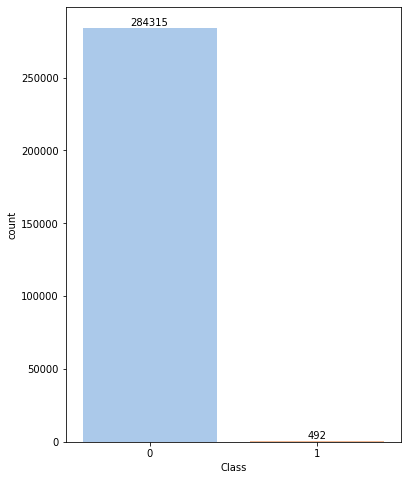

In [5]:
plt.figure(figsize = (6,8))
ax = sns.countplot(x = 'Class', data = df, palette = 'pastel')
for count in ax.containers:
    ax.bar_label(count,)

In [6]:
neg_per = df['Class'].value_counts()[0] / len(df) * 100
pos_per = df['Class'].value_counts()[1] / len(df) * 100
print(f'Genuine: {neg_per} %')
print(f'fraud: {pos_per} %')

Genuine: 99.82725143693798 %
fraud: 0.1727485630620034 %


# Data Preprocessing

In [7]:
df.drop_duplicates(inplace = True)
df.drop('Time', axis = 1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [8]:
def fearture_scaling(df,col):
    features = df[col]
    scaler = StandardScaler().fit(features.values.reshape(-1,1))
    features = scaler.transform(features.values.reshape(-1,1))
    df[col] = features

    return df
fearture_scaling(df,col = 'Amount')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350252,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254325,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082239,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313391,0


# Train test split
Stratified splitting means that when you generate a training / validation dataset split, it will attempt to keep the same percentages of classes in each split.
Below shows to splitting tachnique one without stratify and one with. The percentage of Class is printed to show proportion after splitting. With stratify keeps the class proportion.

In [9]:
X = df.drop(['Class'], axis = 1)
y = df['Class']

### Without stratify

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3)
print(y_train.value_counts() / len(y_train))
print(y_test.value_counts() / len(y_test))

0    0.998333
1    0.001667
Name: Class, dtype: float64
0    0.998332
1    0.001668
Name: Class, dtype: float64


### With stratify

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y, test_size= 0.3)
print(y_train.value_counts() / len(y_train))
print(y_test.value_counts() / len(y_test))

0    0.998333
1    0.001667
Name: Class, dtype: float64
0    0.998332
1    0.001668
Name: Class, dtype: float64


# Baseline model

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

### Stratified cross validation 
Cross validation is used to evaluate model 
1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
    * Take the group as a hold out or test data set
    * Take the remaining groups as a training data set
    * Fit a model on the training set and evaluate it on the test set
    * Retain the evaluation score and discard the model
4. Summarize the skill of the model using the sample of model evaluation scores

Note: The training happens mutiple times, the model is the same but model parameter is trained for every loop. It can be used for hyper parameter search or for model selection, to compare if SVM, Logitsic regression, or Radom forest is the better algo for a certain task.

Using the stratified K fold technqiue makes sure the class proportion stays the same as the whole dataset inside each fold.

In [13]:
stratified_kf = StratifiedKFold(n_splits=5, shuffle = False)
rf = RandomForestClassifier(n_estimators=50,random_state=42)

### Metrics
recall (Sensitivity): TP / (TP + FN) -> The number of positives that were corretly classified over all positive cases. How sentitive is the model to positive cases. Recall should be used when having false negatives is more costly than having false positive. In this use case of detecting credit card fraud, It's more important to catch a fraud case when it truly is fraud, which means the cost of having a false negative is much higher than having a false positive (classifying a case as fraud when it is not).

precision: TP / (TP + FP) -> The number of positives that were corretly classified over all cases that were classified as positive. How correct our model is when it predicts a case to be positive. Precision should be used when having false positives is more costly than having false negatives. EX: In a YouTube recommendation system, educing the number of false positives is of utmost importance. False positives here represent videos that the user does not like, but YouTube is still recommending them. False negatives are of lesser importance here since the YouTube recommendations should only contain videos that the user is more likely to click on. If the user sees recommendations that are not of their liking, they will close the application, which is not what YouTube desires. Most automated marketing campaigns require a high precision value to ensure that a large number of potential customers will interact with their survey or be interested to learn more. Or an easier example would be in a zombie apocalypse. You would try to accept as many healthy people as you can into your safe zone, but you really dont want to mistakenly pass a zombie. The true positive is this case is a healthy person and false positive a zombie. It is more important to avoid zombies than accepting more healthy people. So you create a method that causes some of the healthy people mistakenly not to get into the safe zone, but this is the cost of not letting a zombie in.

F1 score: 2(precision*recall / (precision + recall)) -> F1 score is the harmonic mean of precision and recall, and is used when false negatives and false positves are eqaully costly. 

In [15]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rf,X_train,y_train,cv=stratified_kf,scoring='recall')

KeyboardInterrupt: 

In [ ]:
print(f'Cross Validation Recall scores are: {score}')
print(f'Average Cross Validation Recall scores is: {score.mean()}')

Cross Validation Recall scores are: [0.78787879 0.71212121 0.80597015 0.72727273 0.8030303 ]
Average Cross Validation Recall scores is: 0.7672546359113523


# Hyperparameter search using GridsearchCV

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
params = {
    'n_estimators':[50,100],
    # 'max_depth':[4,8]
}
grid_rf = GridSearchCV(rf, param_grid=params,cv = stratified_kf,scoring='recall').fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
print('Best parameters:', grid_rf.best_params_)
print('Best score:', grid_rf.best_score_)

Best parameters: {'n_estimators': 50}
Best score: 0.7945725915875169


# Test and evaluate model on y_test

In [24]:
from  sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

In [ ]:
y_hat = grid_rf.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test,y_hat)
rf_Recall = recall_score(y_test, y_hat)
rf_Precision = precision_score(y_test, y_hat)
rf_f1 = f1_score(y_test, y_hat)
rf_accuracy = accuracy_score(y_test, y_hat)


In [ ]:
ndf = [(rf_Recall, rf_Precision, rf_f1, rf_accuracy)]

rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
rf_score.insert(0, 'Random Forest with', 'No Under/Oversampling')
rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,No Under/Oversampling,0.704225,0.961538,0.813008,0.99946


From the result, we can see that the Accuracy is extremely high, but this is due to our imbalaced dataset. Since in our use case (detecting credict cardfraud), having false negative (classifying fraud as not fraud) is more costly than having false positive(classyfing not fraud as fraud),we will use  recall score as the evaluation metric.
We will try to beat the baseline model 70.4% recall score in following models.

# Resample
Two technqiues will be done to resample the dataset.
- Oversampling: Randomly duplicate examples in the minority class.
- Undersampling: Randomly delete examples in the majority class.

**Change to the class distribution should be only applied to the training dataset. The intent is to influence the fit of the models. The resampling is not applied to the test or holdout dataset used to evaluate the performance of a model.**



In [35]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [40]:
random_os = RandomOverSampler()
random_us = RandomUnderSampler()

In [41]:
X_over, y_Over = random_os.fit_resample(X_train,y_train)
# The fitted data only contains the traninig data and not the testing
X_under, y_under = random_us.fit_resample(X_train,y_train)
# The fitted data only contains the traninig data and not the testing

In [50]:
print('Oversampling:')
print(f'Genuine class count: {y_Over.value_counts()[0]}')
print(f'Fraud class count: {y_Over.value_counts()[1]}')
print(y_Over.value_counts() / len(y_Over))
print('==================================================================')
print('Undersampling:')
print(f'Genuine class count: {y_under.value_counts()[0]}')
print(f'Fraud class count: {y_under.value_counts()[1]}')
print(y_under.value_counts() / len(y_under))
print('Note: after indersampling the amount of data left to train is very few, not ideal.')

Oversampling:
Genuine class count: 198277
Fraud class count: 198277
0    0.5
1    0.5
Name: Class, dtype: float64
Undersampling:
Genuine class count: 331
Fraud class count: 331
0    0.5
1    0.5
Name: Class, dtype: float64
Note: after indersampling the amount of data left to train is very few, not ideal.


### Building pipeline
5 fold srtratified Cross validattion will split the entire dataset into 5 section with same proportion of classes. Every fold will take turns being the validation set and the training segment will gp through the steps bellow. 
- Oversample / Undersample the minority / majority class
- Train the classifier on the training segment (The oversampled or Undersampled part)
- Validate the classifier with the remaining segment

In [46]:
from imblearn.pipeline import Pipeline, make_pipeline 

In [64]:
random_overs_pipeline = make_pipeline(RandomOverSampler(),RandomForestClassifier(n_estimators = 50,random_state=42))
random_unders_pipeline = make_pipeline(RandomUnderSampler(),RandomForestClassifier(n_estimators = 50,random_state=42))

In [65]:
score2 = cross_val_score(random_overs_pipeline, X_train, y_train, scoring='recall', cv=stratified_kf)
print("Cross Validation Recall Scores are: {}".format(score2))
print("Average Cross Validation Recall score: {}".format(score2.mean()))

score3 = cross_val_score(random_overs_pipeline, X_train, y_train, scoring='recall', cv=stratified_kf)
print("Cross Validation Recall Scores are: {}".format(score3))
print("Average Cross Validation Recall score: {}".format(score3.mean()))

Cross Validation Recall Scores are: [0.75757576 0.68181818 0.82089552 0.75757576 0.8030303 ]
Average Cross Validation Recall score: 0.7641791044776118
Cross Validation Recall Scores are: [0.72727273 0.6969697  0.82089552 0.75757576 0.8030303 ]
Average Cross Validation Recall score: 0.7611488014473089


In [75]:
new_params = {'randomforestclassifier__' + key: params[key] for key in params}

grid_over_rf = GridSearchCV(random_overs_pipeline, param_grid=new_params, cv=stratified_kf, scoring='recall',
                        return_train_score=True)
grid_over_rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('randomoversampler',
                                        RandomOverSampler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(n_estimators=50,
                                                               random_state=42))]),
             param_grid={'randomforestclassifier__n_estimators': [50, 100]},
             return_train_score=True, scoring='recall')

In [76]:
print('Best parameters:', grid_over_rf.best_params_)
print('Best score:', grid_over_rf.best_score_)

Best parameters: {'randomforestclassifier__n_estimators': 50}
Best score: 0.7611488014473089


In [77]:
y_hat = grid_over_rf.best_estimator_.named_steps['randomforestclassifier'].predict(X_test)

In [78]:
cm = confusion_matrix(y_test, y_hat)

over_rf_Recall = recall_score(y_test, y_hat)
over_rf_Precision = precision_score(y_test, y_hat)
over_rf_f1 = f1_score(y_test, y_hat)
over_rf_accuracy = accuracy_score(y_test, y_hat)

print(cm)

[[84967     9]
 [   31   111]]


In [79]:
ndf = [(over_rf_Recall, over_rf_Precision, over_rf_f1, over_rf_accuracy)]

over_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
over_rf_score.insert(0, 'Random Forest with', 'Random Oversampling')
over_rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,Random Oversampling,0.78169,0.925,0.847328,0.99953


In [80]:
grid_under_rf = GridSearchCV(random_unders_pipeline, param_grid=new_params, cv=stratified_kf, scoring='recall',
                        return_train_score=True)
grid_under_rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('randomundersampler',
                                        RandomUnderSampler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(n_estimators=50,
                                                               random_state=42))]),
             param_grid={'randomforestclassifier__n_estimators': [50, 100]},
             return_train_score=True, scoring='recall')

In [81]:
print('Best parameters:', grid_over_rf.best_params_)
print('Best score:', grid_over_rf.best_score_)

Best parameters: {'randomforestclassifier__n_estimators': 50}
Best score: 0.7611488014473089


In [82]:
y_hat = grid_under_rf.best_estimator_.named_steps['randomforestclassifier'].predict(X_test)

In [83]:
cm = confusion_matrix(y_test, y_hat)

under_rf_Recall = recall_score(y_test, y_hat)
under_rf_Precision = precision_score(y_test, y_hat)
under_rf_f1 = f1_score(y_test, y_hat)
under_rf_accuracy = accuracy_score(y_test, y_hat)

print(cm)

[[83247  1729]
 [   15   127]]


In [85]:
ndf = [(under_rf_Recall, under_rf_Precision, under_rf_f1, under_rf_accuracy)]

under_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
under_rf_score.insert(0, 'Random Forest with', 'Random Undersampling')
under_rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,Random Undersampling,0.894366,0.068427,0.127127,0.979511


# SMOTE(Synthetic Minority Oversampling Technique)
SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

In [87]:
from imblearn.over_sampling import SMOTE

In [90]:
smote_pipeline = make_pipeline(SMOTE(),RandomForestClassifier(n_estimators = 50,random_state=42))

In [92]:
score4 = cross_val_score(smote_pipeline, X_train, y_train, scoring='recall', cv=stratified_kf)
print("Cross Validation Recall Scores are: {}".format(score4))
print("Average Cross Validation Recall score: {}".format(score4.mean()))

Cross Validation Recall Scores are: [0.77272727 0.75757576 0.85074627 0.81818182 0.83333333]
Average Cross Validation Recall score: 0.8065128900949796


In [93]:
new_params = {'randomforestclassifier__' + key: params[key] for key in params}

smote_rf = GridSearchCV(smote_pipeline, param_grid=new_params, cv=stratified_kf, scoring='recall',
                        return_train_score=True)
smote_rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('smote', SMOTE()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(n_estimators=50,
                                                               random_state=42))]),
             param_grid={'randomforestclassifier__n_estimators': [50, 100]},
             return_train_score=True, scoring='recall')

In [98]:
print('Best parameters:', smote_rf.best_params_)
print('Best score:', smote_rf.best_score_)

Best parameters: {'randomforestclassifier__n_estimators': 50}
Best score: 0.8065128900949796


In [99]:
y_hat = smote_rf.best_estimator_.named_steps['randomforestclassifier'].predict(X_test)

In [100]:
cm = confusion_matrix(y_test, y_hat)

smote_rf_Recall = recall_score(y_test, y_hat)
smote_rf_Precision = precision_score(y_test, y_hat)
smote_rf_f1 = f1_score(y_test, y_hat)
smote_rf_accuracy = accuracy_score(y_test, y_hat)


In [101]:
ndf = [(smote_rf_Recall, smote_rf_Precision, smote_rf_f1, smote_rf_accuracy)]

smote_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
smote_rf_score.insert(0, 'Random Forest with', 'Random Undersampling')
smote_rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,Random Undersampling,0.809859,0.864662,0.836364,0.999471


# Class weights

In [18]:
class_balance_rf = RandomForestClassifier(n_estimators=50,random_state=42,class_weight='balanced')

In [103]:
score5 = cross_val_score(class_balance_rf, X_train, y_train, cv=stratified_kf, scoring='recall')
print("Cross Validation Recall scores are: {}".format(score5))
print("Average Cross Validation Recall score: {}".format(score5.mean()))

Cross Validation Recall scores are: [0.71212121 0.62121212 0.80597015 0.74242424 0.75757576]
Average Cross Validation Recall score: 0.727860696517413


In [19]:
grid_class_balance_rf = GridSearchCV(class_balance_rf, param_grid=params, cv=stratified_kf, 
                          scoring='recall').fit(X_train, y_train)

In [20]:
print('Best parameters:', grid_class_balance_rf.best_params_)
print('Best score:', grid_class_balance_rf.best_score_)

Best parameters: {'n_estimators': 50}
Best score: 0.7308005427408413


In [21]:
y_hat = grid_class_balance_rf.predict(X_test)

In [25]:
cm = confusion_matrix(y_test, y_hat)

balaced_rf_Recall = recall_score(y_test, y_hat)
balaced_rf_Precision = precision_score(y_test, y_hat)
balaced_rf_f1 = f1_score(y_test, y_hat)
balaced_rf_accuracy = accuracy_score(y_test, y_hat)

In [ ]:
ndf = [(balaced_rf_Recall, balaced_rf_Precision, balaced_rf_f1, balaced_rf_accuracy)]

balaced_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
balaced_rf_score.insert(0, 'Random Forest with', 'Random Undersampling')
balaced_rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,Random Undersampling,0.746479,0.938053,0.831373,0.999495


# ROC curve (receiver operating characteristic curve)
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:
- True positive rate (recall): TP / TP + FN
- Flase positive rate: FP / FP + TN
An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

AUC (Area under curve) is used to evaluate a classification model. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.
Think of it as whating to have the highest true positive rate possible, while having the lowest flase negative rate possible.
**However the ROC is a better metric when the data is balanced.** 
The reason being the False positive rate considers the True Negatives, and when True Negatives is alarge number, the FPR may be small even though the FP is large.

In [27]:
from sklearn.metrics import roc_auc_score
roc_curve_score = roc_auc_score(y_test,y_hat)
print(f'AUC for the random forest model with class weights is: {roc_curve_score:.4f}')

AUC for the random forest model with class weights is: 0.8873


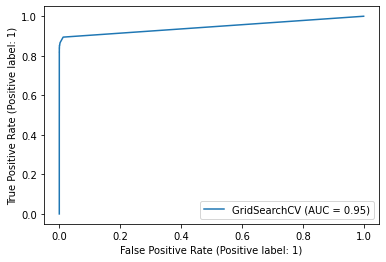

In [29]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(grid_class_balance_rf, X_test, y_test)

# Precission recall curve
**Used often for Imbalanced data** .The precision recall curve is better than the ROC curve at evaluating models fitting an imbalanced dataset because the precision recall curve does not include True negatives in the calculations.

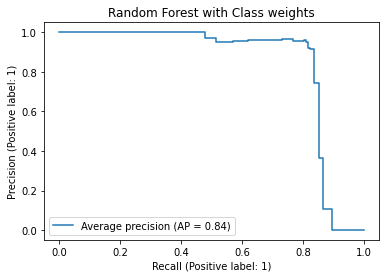

In [30]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    grid_class_balance_rf, X_test, y_test, name="Average precision")
_ = display.ax_.set_title("Random Forest with Class weights")

# Conclusion
A classification data set with skewed class proportions is called imbalanced and it is very common when dealing with machine learning problems. 
- Credit card fraud detection
- Medical disease classification

Some techniques to deal with imbalanced dataset includes oversampling and undersampling (Note that these techniques should only be applied on the training dataset to avoid data leakage). Class weight balancing is another technique to fit the model. 

When dealing with imbalanced dataset "Accuracy" metric should be avoided, since a model that only predicts the majority class will have high accuracy. "Precision" or "Recall (Sensitivity)" should be used depending on the task. If having false negatives are more costly for the task than recall should be used as the evaluation metric. If having false positive is more coslty than precision should be used as the metric.

An ROC graph, is a plot that shows model true positive rate vs. false positive rate in different classification thresholds. The larger the AUC(Area under curve) the better the model is at performing the task.